In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

import seaborn as sns

import urllib.request as req
from urllib.request import urlopen
from urllib.error import HTTPError, URLError
import urllib.parse
from bs4 import BeautifulSoup
import requests

In [52]:
url = "https://www.seoul.go.kr/coronaV/coronaStatus.do"
headers = {"User-Agent":"Mozilla/5.0"} #이부분 잘 기억하기..
page = requests.get(url, headers=headers)
page
soup = BeautifulSoup(page.text, "html.parser")
soup


<!DOCTYPE HTML>

<html lang="ko">
<head>
<meta charset="utf-8">
<meta content="IE=Edge" http-equiv="X-UA-Compatible">
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<title>서울시 코로나19</title>
<meta content="서울시 코로나19 통합사이트 - 코로나19 현황, 재택치료, 안전·방역, 알림·정보, 자료실로 구성" name="description">
<meta content="website" property="og:type">
<meta content="서울시 코로나19 통합사이트" property="og:title">
<meta content="서울시 코로나19 통합사이트 - 코로나19 현황, 재택치료, 안전·방역, 알림·정보, 자료실로 구성" property="og:description">
<meta content="https://www.seoul.go.kr/coronaV/coronaStatus.do" property="og:url">
<meta content="https://www.seoul.go.kr/res_newseoul/images/corona/sns_corona_renewal.jpg" property="og:image">
<meta content="summary" name="twitter:card">
<meta content="서울시 코로나19 통합사이트" name="twitter:title">
<meta content="서울시 코로나19 통합사이트 - 코로나19 현황, 재택치료, 안전·방역, 알림·정보, 자료실로 구성" name="twitter:description">
<meta content="https://www.seoul.go.kr/coronaV/coronaStatus.do" name="twitter:domain">
<meta content="h

In [92]:
# 확진자 테이블 가져오기
corona = soup.find("table", "tstyle-status mobile mobile-table")
corona

<table class="tstyle-status mobile mobile-table" style="width: 100%;margin-bottom: 40px">
<caption>서울시 구별 확진자 현황</caption>
<tbody>
<tr>
<th scope="col">강남구</th>
<th scope="col">강동구</th>
<th scope="col">강북구</th>
<th scope="col">강서구</th>
<th scope="col">관악구</th>
<th scope="col">광진구</th>
</tr>
<tr>
<td>138,907</td>
<td>125,618</td>
<td>76,706</td>
<td>151,638</td>
<td>135,159</td>
<td>98,177</td>
</tr>
<tr>
<td class="today">+2,707</td>
<td class="today">+3,692</td>
<td class="today">+1,588</td>
<td class="today">+3,279</td>
<td class="today">+2,854</td>
<td class="today">+2,169</td>
</tr>
<tr>
<th scope="col">구로구</th>
<th scope="col">금천구</th>
<th scope="col">노원구</th>
<th scope="col">도봉구</th>
<th scope="col">동대문구</th>
<th scope="col">동작구</th>
</tr>
<tr>
<td>112,370</td>
<td>65,085</td>
<td>138,660</td>
<td>84,260</td>
<td>97,440</td>
<td>108,483</td>
</tr>
<tr>
<td class="today">+2,397</td>
<td class="today">+1,398</td>
<td class="today">+3,299</td>
<td class="today">+2,006</td>
<td class

In [138]:
#불러오는데만 1시간 이상 걸렸유ㅜㅠㅜㅠㅜ

# 구 목록 불러오기
gulist=[]
gu = corona.find_all("th", {'scope':'col'})
#gulist.append(gu)
#gulist
for a in gu:
    gulist.append(a.get_text())

gulist
len(gulist)

26

In [141]:
# 오늘 확진자 불러오기
today_corona=[]
today=corona.find_all('td', {'class':'today'})
today

for a in today:
    today_corona.append(a.get_text())
    
today_corona

['+2,707',
 '+3,692',
 '+1,588',
 '+3,279',
 '+2,854',
 '+2,169',
 '+2,397',
 '+1,398',
 '+3,299',
 '+2,006',
 '+2,007',
 '+2,245',
 '+2,075',
 '+1,851',
 '+2,616',
 '+1,635',
 '+2,366',
 '+3,528',
 '+2,504',
 '+2,597',
 '+1,142',
 '+2,810',
 '+731',
 '+625',
 '+2,247',
 '+3,763']

In [146]:
# df로 저장
data={'지역':gulist, '확진자 수':today_corona}
df=pd.DataFrame(data)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      26 non-null     object
 1   확진자 수   26 non-null     object
dtypes: object(2)
memory usage: 544.0+ bytes


In [148]:
# 확진자 수 '+' 제거
df['확진자 수']=df['확진자 수'].str.replace(pat=r'[^\w]', repl=r'', regex=True)
df.head()

,지역,확진자 수
0,강남구,2707
1,강동구,3692
2,강북구,1588
3,강서구,3279
4,관악구,2854


In [150]:
# 확진자 수 type 변경
df=df.astype({'확진자 수':'int64'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      26 non-null     object
 1   확진자 수   26 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 544.0+ bytes


In [156]:
# 인덱스 지역으로 바꾸기
df.set_index('지역', inplace=True)
df.head()

,확진자 수
지역,
강남구,2707
강동구,3692
강북구,1588
강서구,3279
관악구,2854


<AxesSubplot:xlabel='지역'>

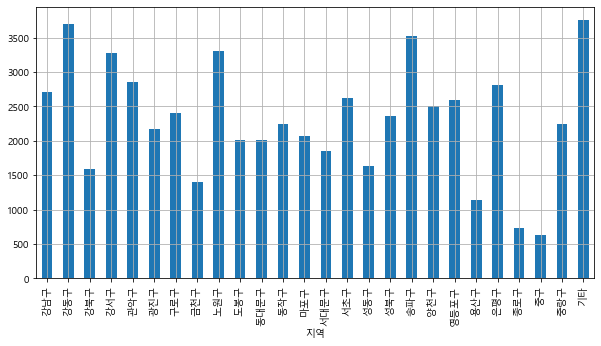

In [157]:
df['확진자 수'].plot(kind="bar", figsize=(10,5), grid=True)

In [142]:
"""
from bs4 import BeautifulSoup
import requests

base_url = 'http://dh.aks.ac.kr/Encyves/wiki/index.php/조선_세종'
con = requests.get(base_url)
soup = BeautifulSoup(con.content, 'lxml')

infoTable = soup.find("table",{"class":"wikitable sortable"})
infoPrint =[]
for a in infoTable.find_all("tr"):
    infolist = []
    for b in a.find_all("td"):
        info = b.get_text()
        infolist.append(info)
    infoPrint.append(infolist)
print(infoPrint)
"""

'\nfrom bs4 import BeautifulSoup\nimport requests\n\nbase_url = \'http://dh.aks.ac.kr/Encyves/wiki/index.php/조선_세종\'\ncon = requests.get(base_url)\nsoup = BeautifulSoup(con.content, \'lxml\')\n\ninfoTable = soup.find("table",{"class":"wikitable sortable"})\ninfoPrint =[]\nfor a in infoTable.find_all("tr"):\n    infolist = []\n    for b in a.find_all("td"):\n        info = b.get_text()\n        infolist.append(info)\n    infoPrint.append(infolist)\nprint(infoPrint)\n'